Nodos: ['A', 'B', 'C', 'D']
Aristas con atributos: [('A', 'B', {'capacity': 2}), ('A', 'C', {'capacity': 1}), ('B', 'C', {'capacity': 3}), ('B', 'D', {'capacity': 2}), ('D', 'C', {'capacity': 4})]


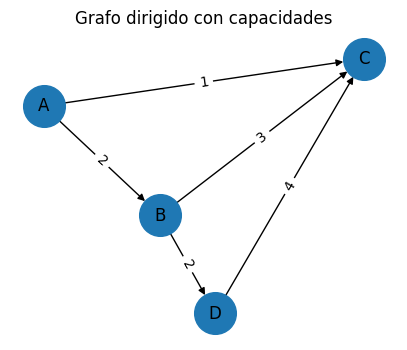

Ruta más corta A→C: ['A', 'C'] | Longitud: 1
Valor del flujo máximo A→C: 3
Flujos por arista: {'A': {'B': 2, 'C': 1}, 'B': {'C': 2, 'D': 0}, 'C': {}, 'D': {'C': 0}}
Costo total del MST: 39.0
Aristas del MST: [('A', 'D', {'weight': 5}), ('A', 'B', {'weight': 7}), ('B', 'E', {'weight': 7}), ('D', 'F', {'weight': 6}), ('C', 'E', {'weight': 5}), ('E', 'G', {'weight': 9})]


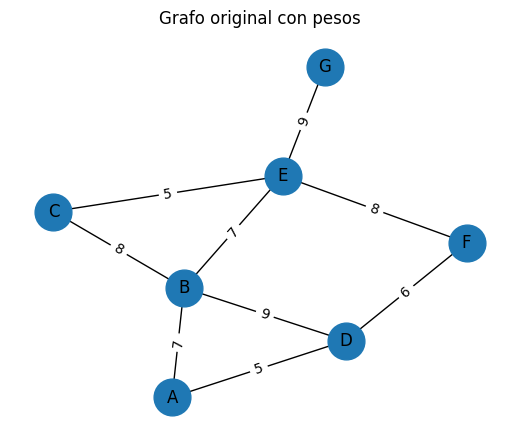

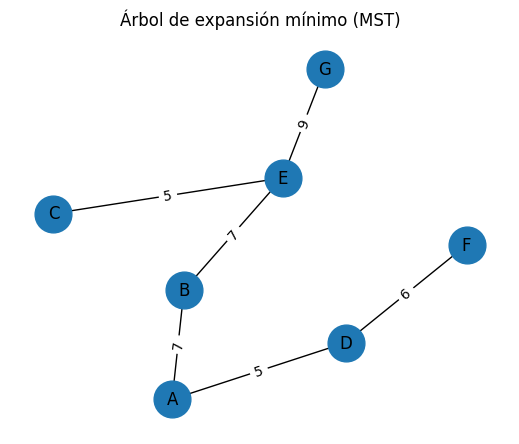

In [ ]:
# %% [markdown]
# # Tutorial intermedio de NetworkX
#
# En este cuaderno se muestra cómo usar **NetworkX** para trabajar con grafos.
#
# ## Objetivos:
# - Crear un grafo dirigido con capacidades.
# - Visualizar el grafo con etiquetas.
# - Calcular ruta más corta y flujo máximo.
# - Ejemplo extra con árbol de expansión mínimo.

# %% [markdown]
# ## 1) Librerías

# %%
# En Colab, si no está instalado:
# !pip install networkx matplotlib

import networkx as nx
import matplotlib.pyplot as plt

# %% [markdown]
# ## 2) Grafo dirigido con capacidades
# Creamos un `DiGraph` y agregamos aristas con el atributo `capacity`.

# %%
G = nx.DiGraph()
G.add_edge("A","B", capacity=2)
G.add_edge("A","C", capacity=1)
G.add_edge("B","C", capacity=3)
G.add_edge("B","D", capacity=2)
G.add_edge("D","C", capacity=4)

print("Nodos:", list(G.nodes()))
print("Aristas con atributos:", list(G.edges(data=True)))

# %% [markdown]
# ## 3) Visualización del grafo
# Dibujamos el grafo y mostramos las **capacidades** en cada arista.

# %%
plt.figure(figsize=(5,4))
pos = nx.spring_layout(G, seed=7)
nx.draw_networkx(G, pos, with_labels=True, node_size=900, arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G,'capacity'))
plt.title("Grafo dirigido con capacidades")
plt.axis("off")
plt.show()

# %% [markdown]
# ## 4) Ruta más corta
# Calculamos la ruta más corta entre **A** y **C**

# %%
ruta = nx.shortest_path(G, source="A", target="C")
longitud = nx.shortest_path_length(G, source="A", target="C")
print("Ruta más corta A→C:", ruta, "| Longitud:", longitud)

# %% [markdown]
# ## 5) Flujo máximo
# Con `nx.maximum_flow` calculamos el flujo máximo de **A** a **C**.

# %%
valor, flujo = nx.maximum_flow(G, 'A', 'C', capacity='capacity')
print("Valor del flujo máximo A→C:", valor)
print("Flujos por arista:", flujo)

# %% [markdown]
# ## 6) Ejemplo extra: Árbol de expansión mínimo
# En un grafo no dirigido con pesos, el **MST** conecta todos los nodos con el costo mínimo.

# %%
M = nx.Graph()
M.add_weighted_edges_from([
    ('A','B',7), ('A','D',5),
    ('B','C',8), ('B','D',9), ('B','E',7),
    ('C','E',5), ('D','F',6),
    ('E','F',8), ('E','G',9)
])

T = nx.minimum_spanning_tree(M, weight='weight')
print("Costo total del MST:", T.size(weight='weight'))
print("Aristas del MST:", list(T.edges(data=True)))

plt.figure(figsize=(5,4))
pos = nx.spring_layout(M, seed=1)
nx.draw(M, pos, with_labels=True, node_size=700)
nx.draw_networkx_edge_labels(M, pos, edge_labels=nx.get_edge_attributes(M,'weight'))
plt.title("Grafo original con pesos")
plt.show()

plt.figure(figsize=(5,4))
nx.draw(T, pos, with_labels=True, node_size=700)
nx.draw_networkx_edge_labels(T, pos, edge_labels=nx.get_edge_attributes(T,'weight'))
plt.title("Árbol de expansión mínimo (MST)")
plt.show()